In [14]:
import numpy as np

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Load dataset
x_train_val = np.load('drive/Shareddrives/Redes Neuronales BIO/CIFAR-100/x_train.npy')
y_train_val = np.load('drive/Shareddrives/Redes Neuronales BIO/CIFAR-100/y_train.npy')
x_test = np.load('drive/Shareddrives/Redes Neuronales BIO/CIFAR-100/x_test.npy')

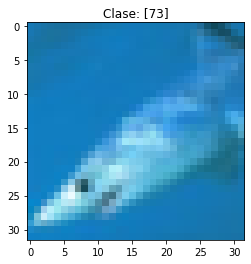

In [17]:
from matplotlib import pyplot as plt
#Mostramos alguna imágen
idx = 50
plt.imshow(x_train_val[idx])
plt.title(f'Clase: {y_train_val[idx]}')
plt.show()

In [18]:
#Dividimos entre train y validación
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x_train_val, y_train_val, test_size=0.15, random_state=42, stratify=y_train_val)

In [19]:
#Normalizamos
x_train_norm = x_train/255
x_val_norm = x_val/255
x_test_norm = x_test/255

In [20]:
#Armamos la red de clasificación
from tensorflow.keras.layers import Dense, Flatten, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam

In [32]:
model = Sequential()
model.add(Conv2D(64,3, input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(128,3, padding='same'))
model.add(Conv2D(128,3, padding='same'))
model.add(Conv2D(128,3, padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(256,3, padding='same'))
model.add(Conv2D(256,3, padding='same'))
model.add(Conv2D(256,3, padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(100, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer= Adam(learning_rate=0.001), metrics=["accuracy"])

In [33]:
model.fit(x_train_norm, y_train, batch_size = 256, validation_data = (x_val_norm, y_val), epochs=10)

Epoch 1/10
167/167 [==============================] - 10s 55ms/step - loss: 4.0618 - accuracy: 0.0971 - val_loss: 5.1265 - val_accuracy: 0.0211
Epoch 2/10
167/167 [==============================] - 9s 53ms/step - loss: 3.4322 - accuracy: 0.1823 - val_loss: 4.6026 - val_accuracy: 0.0412
Epoch 3/10
167/167 [==============================] - 9s 53ms/step - loss: 3.2530 - accuracy: 0.2161 - val_loss: 4.0397 - val_accuracy: 0.0979
Epoch 4/10
167/167 [==============================] - 9s 53ms/step - loss: 2.8757 - accuracy: 0.2833 - val_loss: 4.0385 - val_accuracy: 0.1385
Epoch 5/10
167/167 [==============================] - 9s 54ms/step - loss: 2.7888 - accuracy: 0.3007 - val_loss: 3.7005 - val_accuracy: 0.1521
Epoch 6/10
167/167 [==============================] - 9s 54ms/step - loss: 2.8549 - accuracy: 0.2839 - val_loss: 3.3909 - val_accuracy: 0.2125
Epoch 7/10
167/167 [==============================] - 9s 54ms/step - loss: 2.6353 - accuracy: 0.3301 - val_loss: 3.3647 - val_accuracy: 0.214

In [24]:
model.fit(x_train_norm, y_train, batch_size = 256, validation_data = (x_val_norm, y_val), epochs=10)

Epoch 1/10
167/167 [==============================] - 4s 23ms/step - loss: 1.8213 - accuracy: 0.5048 - val_loss: 2.8911 - val_accuracy: 0.2832
Epoch 2/10
167/167 [==============================] - 4s 23ms/step - loss: 1.7647 - accuracy: 0.5200 - val_loss: 3.2266 - val_accuracy: 0.2481
Epoch 3/10
167/167 [==============================] - 4s 23ms/step - loss: 1.6723 - accuracy: 0.5428 - val_loss: 4.7409 - val_accuracy: 0.1411
Epoch 4/10
167/167 [==============================] - 4s 23ms/step - loss: 1.6490 - accuracy: 0.5500 - val_loss: 2.7850 - val_accuracy: 0.3172
Epoch 5/10
167/167 [==============================] - 4s 23ms/step - loss: 1.5925 - accuracy: 0.5602 - val_loss: 2.4885 - val_accuracy: 0.3811
Epoch 6/10
167/167 [==============================] - 4s 23ms/step - loss: 1.6038 - accuracy: 0.5575 - val_loss: 3.5139 - val_accuracy: 0.2353
Epoch 7/10
167/167 [==============================] - 4s 23ms/step - loss: 1.5789 - accuracy: 0.5630 - val_loss: 2.7197 - val_accuracy: 0.3223